In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [32]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.shape
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

train.shape

(10886, 19)

In [5]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

<AxesSubplot:>

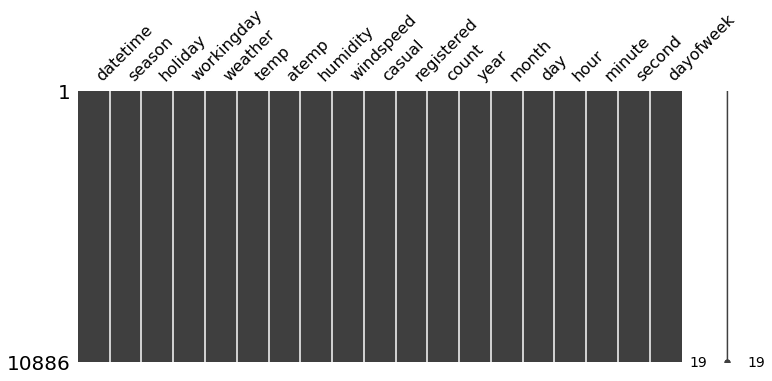

In [6]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

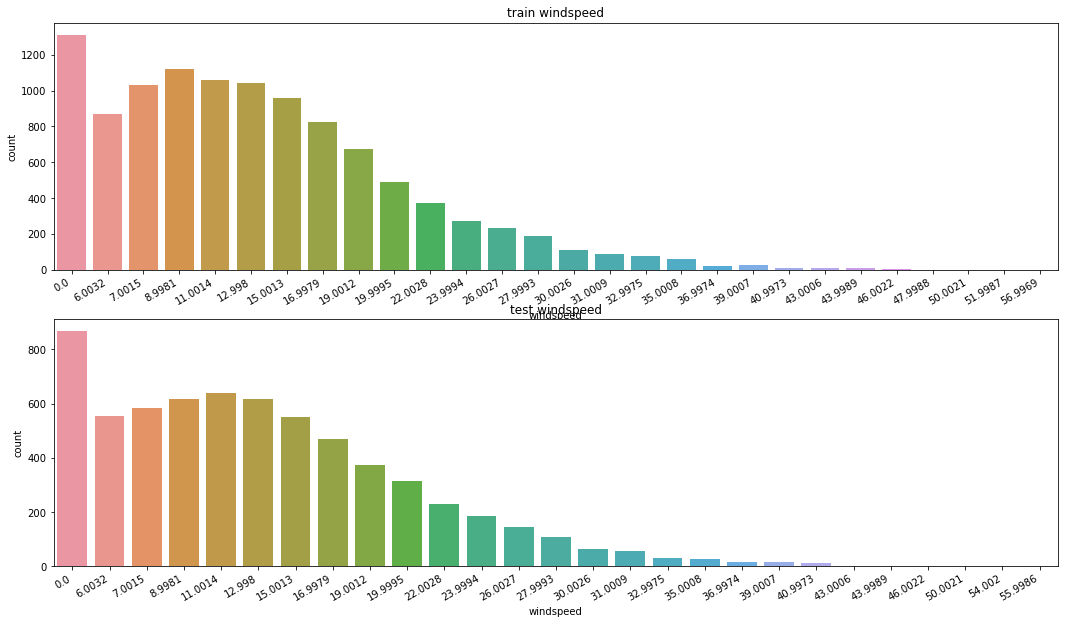

In [7]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title='train windspeed')
sns.countplot(data=train, x="windspeed",ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title='test windspeed')
sns.countplot(data=test, x="windspeed", ax=axes[1])

In [8]:
# feature engineering

# Numerical Imputation: 결측치를 0이나 중앙값으로 대체
# Categorical Imputation: 열의 가장 많이 발생한 값으로 결측치를 대체, 만약 많이 발생한 값이 없다면 'Other’로 대체
# Random sample imputation: 데이터셋에서 임의로 뽑은 값으로 결측치 대체
# End of Distribution Imputation: 결측치를 mean+3*std로 대체

# 단순한 값의 assignment는 count 예측에 도움이 되지 않을듯?


In [18]:
from sklearn.ensemble import RandomForestClassifier

def perdict_windspeed(data):
    
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    wCol = ["season","weather","humidity","month","temp", "year", "atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rfModel_wind = RandomForestClassifier()
    
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0Values
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True, axis=1)
    
    return data

In [19]:
train = perdict_windspeed(train)

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

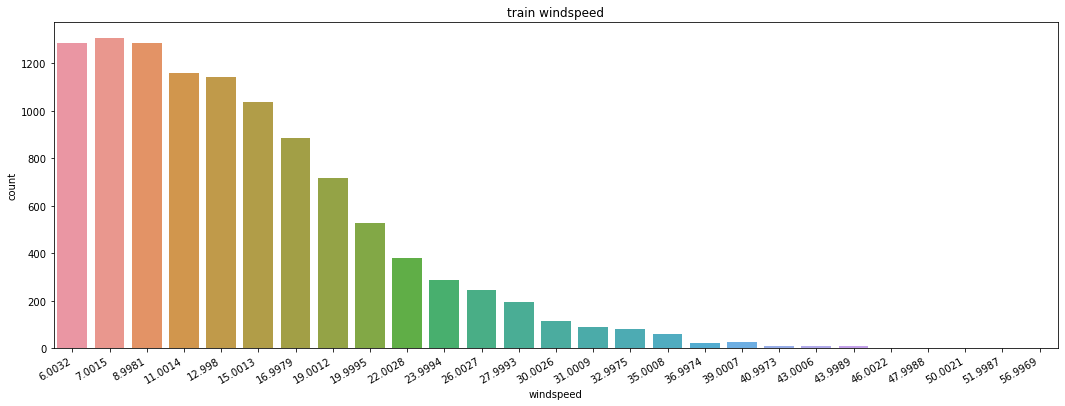

In [21]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x="windspeed", ax=ax1)

# Importance of Feature Engineering

- Better features means flexibility.
- Better features means simpler models.
- Better features means better results.


- 신호와 잡음을 구별하자
- 많은 피처가 좋은 성능을 보장하지 않는다
- 한번에 좋은 feature set을 찾을 수 없음. 그래서 많은 시행이 필요하다 !



In [ ]:
# continuous feature = ["temp", "humidity", "windspeed", "atemp"]
# 범주형 feature의 type을 categorize

categorical_feature_names = ["season", "holiday", "workingday","weather", "dayofweek", "month", "year", "hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype["category"]
    test[var] = test[var].astype["category"]

In [22]:
feature_names = ["season", "weather", "temp", "atemp", "humidity","windspeed","year"
                , "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [23]:
X_train = train[feature_names]

In [24]:
X_train.shape

(10886, 11)

In [26]:
X_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [27]:
X_test = test[feature_names]
X_test.shape

(6493, 11)

In [28]:
X_test.shape

(6493, 11)

In [29]:
label_name = "count"

y_train = train[label_name]

y_train.shape
    

(10886,)

In [34]:
y_train.head(10)

0      1
1     36
2     56
3     84
4     94
5    106
6    110
7     93
8     67
9     35
Name: count, dtype: int64

In [33]:
y_train.tail()

10881    232
10882    211
10883    662
10884    132
10885     41
Name: count, dtype: int64

# RMSLE

- 과대평가 된 항목보다 과소평가 된 항목에 페널티
- 0에 가까울수록 정밀도가 높은 값

In [35]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [66]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=500,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [67]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

print("Score= {0:.5f}".format(score))

CPU times: user 7.25 s, sys: 7.33 s, total: 14.6 s
Wall time: 30.2 s
Score= 0.32925


In [68]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [69]:
predictions = model.predict(X_test)

print(predictions.shape)
print(predictions[0:10])

(6493,)
[ 12.056   4.846   4.099   3.488   2.984   6.568  38.53  107.178 239.308
 136.726]


[Text(0.5, 1.0, 'test')]

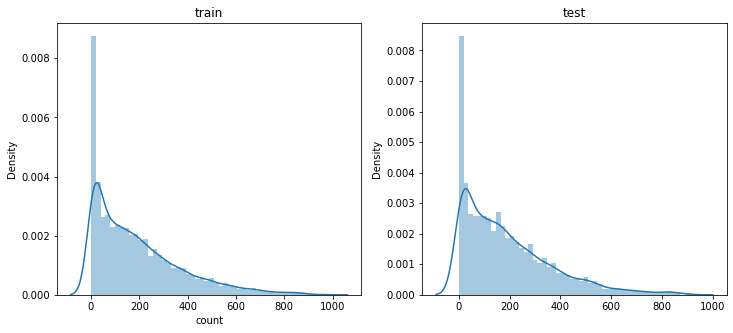

In [70]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title="train")

sns.distplot(predictions, ax=ax2, bins=50)
ax2.set(title="test")

In [71]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.056
1,2011-01-20 01:00:00,4.846
2,2011-01-20 02:00:00,4.099
3,2011-01-20 03:00:00,3.488
4,2011-01-20 04:00:00,2.984


In [72]:
submission.to_csv("Score_{0:5f}_submission.csv".format(score), index=False)